In [1]:
# -*- coding: utf-8 -*-
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

import numpy as np
import pandas as pd
import scipy as sp  # scientific computation library
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
# Part 1

In [3]:
# Generating data
N = 10000
p = 8

rng = np.random.default_rng(seed=42)
X = 10*rng.random(size=(N,p)) - 10 # uniform distribution between -10 and 10
w_true = 10*rng.random(size=(p,1)) -5 # uniform distribution between -5 and 5
y = (X @ w_true) + np.random.normal(0, 1, (N,1))

In [4]:
# closed form
w_est_cf = np.linalg.inv(X.T @ X) @ X.T @ y
y_est_cf = X @ w_est_cf

E_cf = (1/len(y))*(y - y_est_cf).T @ (y - y_est_cf)
E_cf_true = (1/len(y))*(X @ w_true - y_est_cf).T @ (X @ w_true - y_est_cf)
print("final error was:", E_cf)
print("final true error was:", E_cf_true)

final error was: [[0.96806817]]
final true error was: [[0.00051045]]


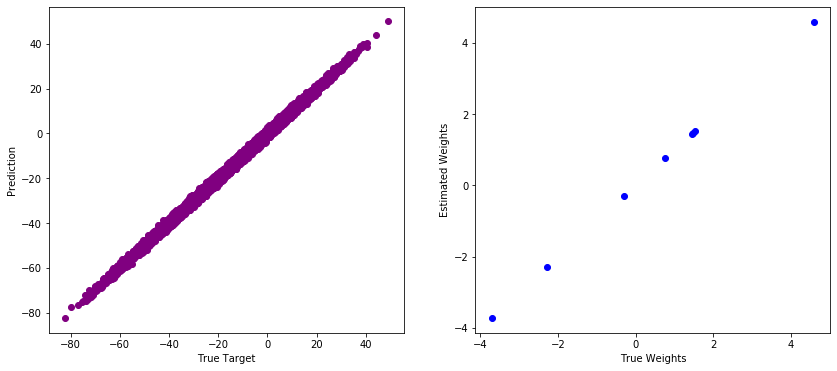

In [5]:
# plotting CF solution
fig, ax = plt.subplots(figsize=(14,6),nrows=1, ncols=2)
ax[0].set(xlabel="True Target", ylabel="Prediction")
ax[0].scatter(y, y_est_cf, c='purple')
ax[1].set(xlabel="True Weights", ylabel="Estimated Weights")
ax[1].scatter(w_true, w_est_cf, c='b')
#plt.savefig('CF_solution.jpg')

In [6]:
# gradient descent
w_evolution = []
E_evolution = []

rate = 0.001
w_current = np.zeros(shape=(p,1))
w_evolution.append(w_current)
gradE = np.ones(shape=(p,1))

while max(abs(gradE))>0.01:
    E = (1/len(y))*(y - X @ w_current).T @ (y - X @ w_current)
    E_evolution.append(E)

    gradE = -2*(1/len(y))*X.T @ (y - X @ w_current)
    
    w_current = w_current - rate*gradE
    w_evolution.append(w_current)
    
w_evolution = np.asarray(w_evolution)
E_evolution = np.asarray(E_evolution)

In [7]:
# gradient descent solution
w_est_GD = w_current
y_est_GD = X @ w_est_GD
print("final error was:", E)
E_GD_true = (1/len(y))*(X @ w_true - y_est_GD).T @ (X @ w_true - y_est_GD)
print("final error was:", E_GD_true)

final error was: [[0.96807614]]
final error was: [[0.00046531]]


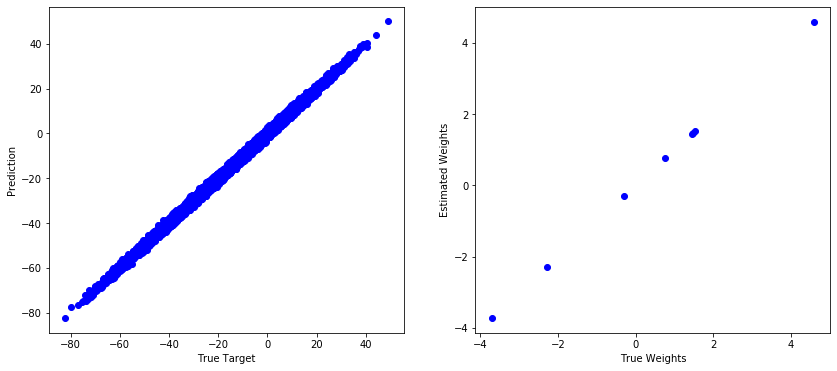

In [8]:
# plotting gradient descent solution
fig, ax = plt.subplots(figsize=(14,6),nrows=1, ncols=2)
ax[0].set(xlabel="True Target", ylabel="Prediction")
ax[0].scatter(y, y_est_GD, c='b')
ax[1].set(xlabel="True Weights", ylabel="Estimated Weights")
ax[1].scatter(w_true, w_est_GD, c='b')

#plt.savefig('GD_solution.jpg')

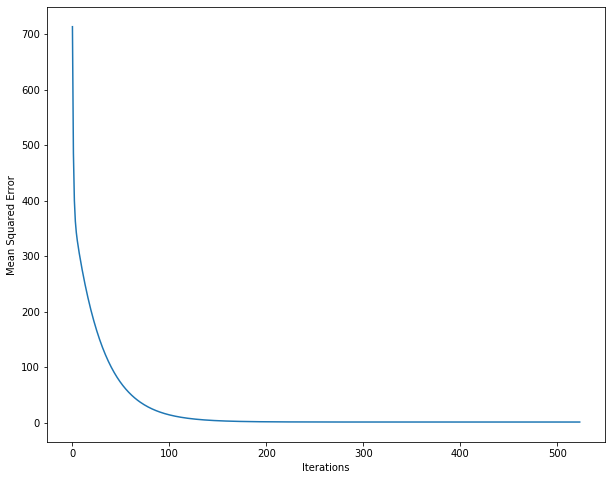

In [9]:
# plotting Error evolution
t = np.arange(len(E_evolution))
E_evolution = E_evolution.reshape(len(E_evolution),1)
plt.figure(figsize=(10,8))
plt.plot(t, E_evolution)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
#plt.savefig('GD_Loss.jpg')
plt.show()

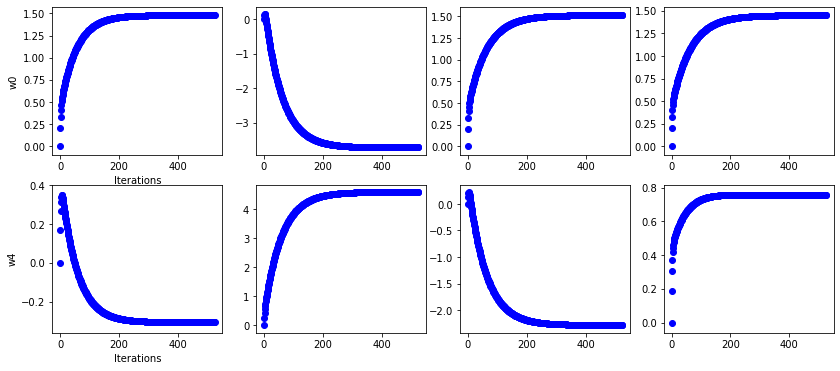

In [10]:
# plotting evolution of weights
t = np.arange(len(w_evolution[:,0]))
k=0
fig, ax = plt.subplots(figsize=(14,6),nrows=2, ncols=4)
for i in range(2):
    if i==0:
        ax[i][0].set(xlabel="Iterations", ylabel="w0")
    else:
        ax[i][0].set(xlabel="Iterations", ylabel="w4")
    for j in range(4):     
        ax[i][j].scatter(t, w_evolution[:,k], c='b')
        k = k+1
#plt.savefig('GD_weights.jpg')

In [11]:
# Stochastic gradient descent
def SGD(iters, rate_SGD, p, N, X, y):
    w_evolution_SGD = []
    E_evolution_SGD = []

    #rng = np.random.default_rng(seed=42)
    #w_current_SGD = 50*rng.random(size=(p,1)) -25 # uniform distribution between -25 and 25
    w_current_SGD = np.zeros(shape=(p,1))
    w_evolution_SGD.append(w_current_SGD)
    
    #while max(abs(gradE_SGD))>0.01:
    for k in range(iters):
        E_SGD = (1/len(y))*(y - X @ w_current_SGD).T @ (y - X @ w_current_SGD)
        E_evolution_SGD.append(E_SGD)
    
        i = np.random.randint(0, high=N)
        gradE_SGD = -2*(y[i] - X[i] @ w_current_SGD)*X[i]
        gradE_SGD = gradE_SGD.reshape(p,1)
    
        w_current_SGD = w_current_SGD - rate_SGD*gradE_SGD
        w_evolution_SGD.append(w_current_SGD)
    
    w_evolution_SGD = np.asarray(w_evolution_SGD)
    E_evolution_SGD = np.asarray(E_evolution_SGD)
    
    return w_current_SGD, E_SGD, E_evolution_SGD, w_evolution_SGD

In [12]:
iters = 500 # chosen number of iterations
rate_SGD = 0.001
SGD_sim = SGD(iters, rate_SGD, p, N, X, y)
E_evolution_SGD = SGD_sim[2]
w_evolution_SGD = SGD_sim[3]

In [13]:
# stochastic gradient descent solution
w_est_SGD = SGD_sim[0]
y_est_SGD = X @ w_est_SGD
E_SGD_true = (1/len(y))*(X @ w_true - y_est_SGD).T @ (X @ w_true - y_est_SGD)
print("final error was:", SGD_sim[1])
print("final true error was:", E_SGD_true)

final error was: [[1.8477756]]
final true error was: [[0.87074197]]


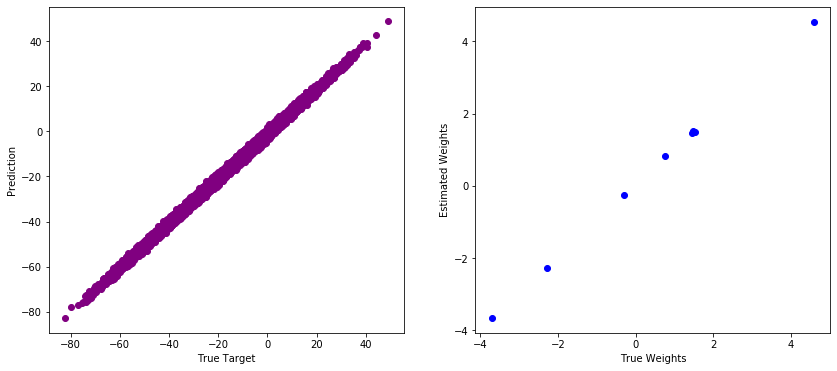

In [14]:
# plotting stochastic gradient descent solution
fig, ax = plt.subplots(figsize=(14,6),nrows=1, ncols=2)
ax[0].set(xlabel="True Target", ylabel="Prediction")
ax[0].scatter(y, y_est_SGD, c='purple')
ax[1].set(xlabel="True Weights", ylabel="Estimated Weights")
ax[1].scatter(w_true, w_est_SGD, c='b')
#plt.savefig('SGD_solution.jpg')

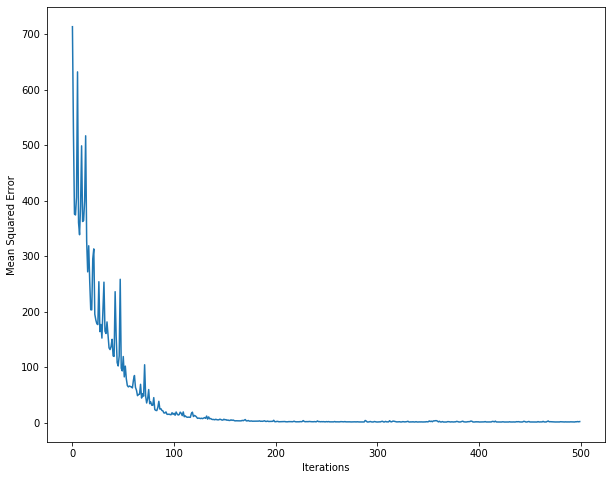

In [15]:
# plotting Error evolution
t_SGD = np.arange(len(E_evolution_SGD))
E_evolution_SGD = E_evolution_SGD.reshape(len(E_evolution_SGD),1)
plt.figure(figsize=(10,8))
plt.plot(t_SGD, E_evolution_SGD)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
#plt.savefig('SGD_Loss.jpg')
plt.show()

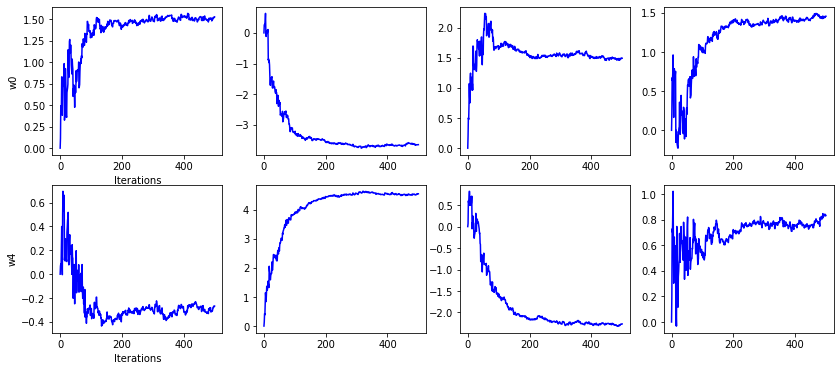

In [16]:
# plotting evolution of weights
t_SGD = np.arange(len(w_evolution_SGD[:,0]))
k=0
fig, ax = plt.subplots(figsize=(14,6),nrows=2, ncols=4)
for i in range(2):
    if i==0:
        ax[i][0].set(xlabel="Iterations", ylabel="w0")
    else:
        ax[i][0].set(xlabel="Iterations", ylabel="w4")
    for j in range(4):     
        ax[i][j].plot(t_SGD, w_evolution_SGD[:,k], c='b')
        k = k+1
#plt.savefig('SGD_weights.jpg')

In [17]:
# Why does the error function not converge to a fixed answer in SGD?
# Gradient varies from iteration to iteration as it is dependent on the single randomly selected data point
# Mini Batch gradient descent provides a medium between computational performance of SGD and the smooth error minimisation
# of gradient descent- it uses a sample of data points to compute the gradient

In [18]:
# Mini Batch gradient descent
w_evolution_BGD = []
E_evolution_BGD = []

n = 500 # number of batches
s = int(len(y)/n) # mini batch size- number of data points used to compute gradient
print("mini batch size is:", s)
print(n, "batches were used \n")
rate_BGD = 0.001
w_current_BGD = np.zeros(shape=(p,1))
w_evolution_BGD.append(w_current_BGD)

for k in range(n):
    E_BGD = (1/len(y))*(y - X @ w_current_BGD).T @ (y - X @ w_current_BGD)
    E_evolution_BGD.append(E_BGD)
    
    gradE_BGD = -2*(1/s)*X[k*s:(k+1)*s].T @ (y[k*s:(k+1)*s] - X[k*s:(k+1)*s] @ w_current_BGD)
    gradE_BGD = gradE_BGD.reshape(p,1)
    
    w_current_BGD = w_current_BGD - rate_BGD*gradE_BGD
    w_evolution_BGD.append(w_current_BGD)
    
w_evolution_BGD = np.asarray(w_evolution_BGD)
E_evolution_BGD = np.asarray(E_evolution_BGD)

mini batch size is: 20
500 batches were used 



In [19]:
# mini batch gradient descent solution
w_est_BGD = w_current_BGD
y_est_BGD = X @ w_est_BGD
E_BGD_true = (1/len(y))*(X @ w_true - y_est_BGD).T @ (X @ w_true - y_est_BGD)
print("final error was:", E_BGD)
print("final true error was:", E_BGD_true)

final error was: [[0.98838554]]
final true error was: [[0.01278593]]


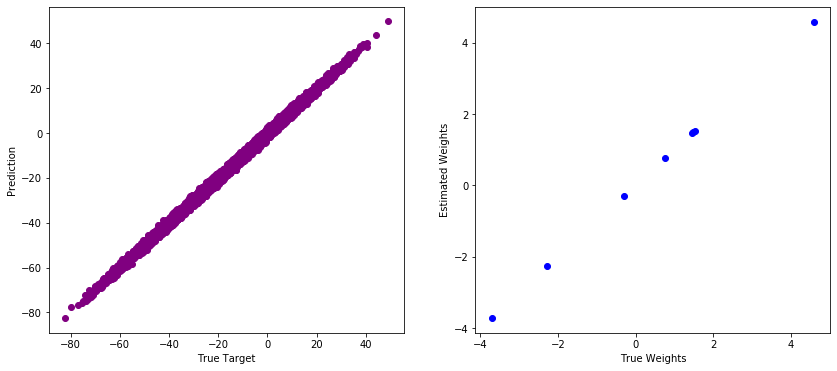

In [20]:
# plotting minibatch gradient descent solution
fig, ax = plt.subplots(figsize=(14,6),nrows=1, ncols=2)
ax[0].set(xlabel="True Target", ylabel="Prediction")
ax[0].scatter(y, y_est_BGD, c='purple')
ax[1].set(xlabel="True Weights", ylabel="Estimated Weights")
ax[1].scatter(w_true, w_est_BGD, c='b')
#plt.savefig('MBGD_solution.jpg')

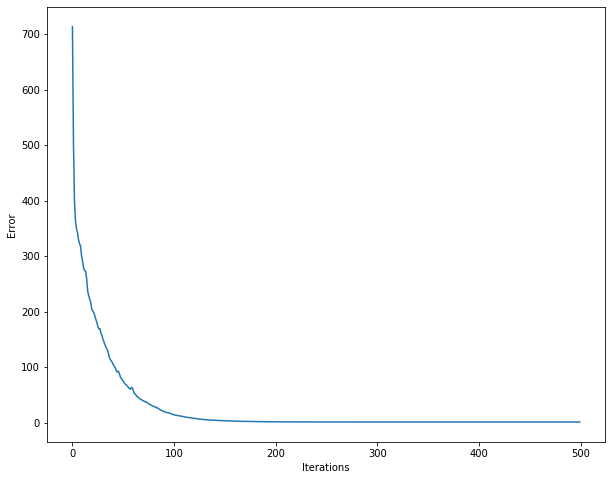

In [21]:
# plotting Error evolution
t_BGD = np.arange(len(E_evolution_BGD))
E_evolution_BGD = E_evolution_BGD.reshape(len(E_evolution_BGD),1)
plt.figure(figsize=(10,8))
plt.plot(t_BGD, E_evolution_BGD)
plt.xlabel('Iterations')
plt.ylabel('Error')
#plt.savefig('MBGD_Loss.jpg')
plt.show()

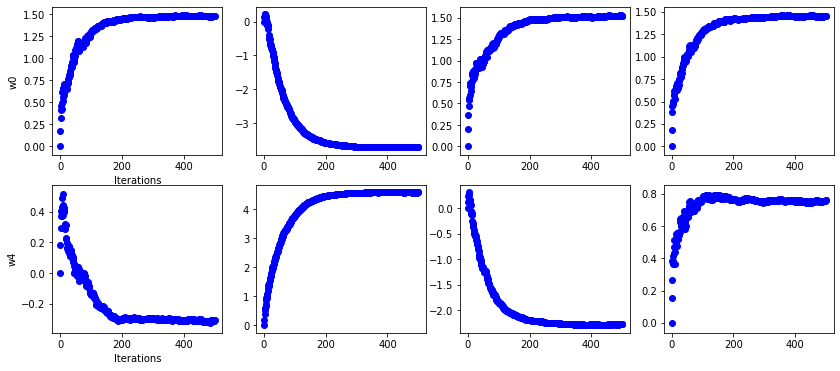

In [22]:
# plotting evolution of weights
t_BGD = np.arange(len(w_evolution_BGD[:,0]))
k=0
fig, ax = plt.subplots(figsize=(14,6),nrows=2, ncols=4)
for i in range(2):
    if i==0:
        ax[i][0].set(xlabel="Iterations", ylabel="w0")
    else:
        ax[i][0].set(xlabel="Iterations", ylabel="w4")
    for j in range(4):     
        ax[i][j].scatter(t_BGD, w_evolution_BGD[:,k], c='b')
        k = k+1
#plt.savefig('MBGD_weights.jpg')

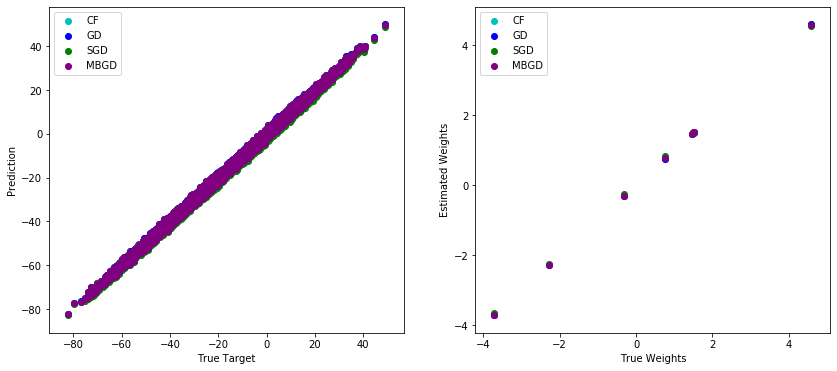

In [24]:
# plotting gradient descent solution
fig, ax = plt.subplots(figsize=(14,6),nrows=1, ncols=2)
ax[0].set(xlabel="True Target", ylabel="Prediction")
ax[0].scatter(y, y_est_cf, c='c', label='CF')
ax[0].scatter(y, y_est_GD, c='b', label='GD')
ax[0].scatter(y, y_est_SGD, c='g', label='SGD')
ax[0].scatter(y, y_est_BGD, c='purple', label='MBGD')
ax[1].set(xlabel="True Weights", ylabel="Estimated Weights")
ax[1].scatter(w_true, w_est_cf, c='c', label='CF')
ax[1].scatter(w_true, w_est_GD, c='b', label='GD')
ax[1].scatter(w_true, w_est_SGD, c='g', label='SGD')
ax[1].scatter(w_true, w_est_BGD, c='purple', label='MBGD')
ax[0].legend()
ax[1].legend()
#plt.savefig('Prediction.jpg')
plt.show()

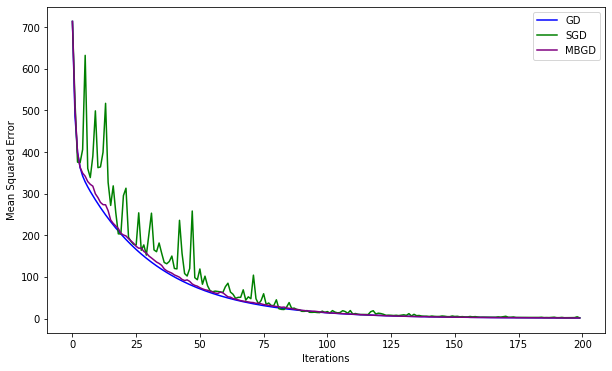

In [25]:
# plotting Error evolution
plt.figure(figsize=(10,6))
plt.plot(t[0:200], E_evolution[0:200], c='b', label='GD')
plt.plot(t_SGD[0:200], E_evolution_SGD[0:200], c='g', label='SGD')
plt.plot(t_BGD[0:200], E_evolution_BGD[0:200], c='purple', label='MBGD')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
#plt.savefig('Losses.jpg')
plt.show()

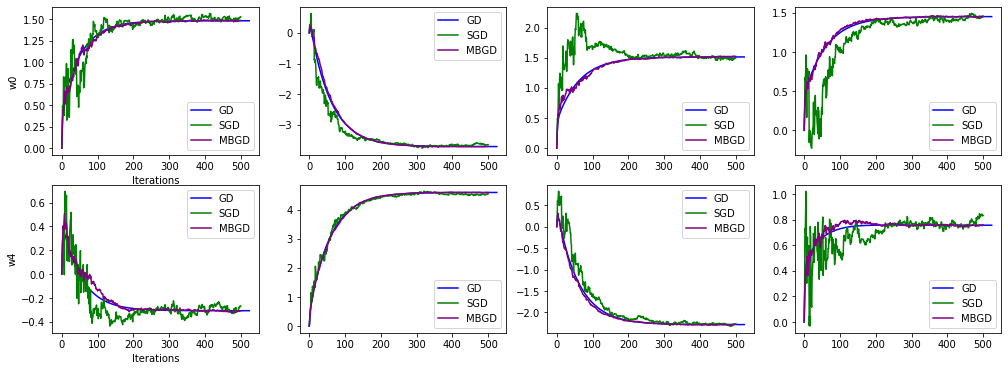

In [26]:
# plotting evolution of weights
k=0
fig, ax = plt.subplots(figsize=(17,6),nrows=2, ncols=4)
for i in range(2):
    if i==0:
        ax[i][0].set(xlabel="Iterations", ylabel="w0")
    else:
        ax[i][0].set(xlabel="Iterations", ylabel="w4")
    for j in range(4):     
        ax[i][j].plot(t, w_evolution[:,k], c='b', label='GD')
        ax[i][j].plot(t_SGD, w_evolution_SGD[:,k], c='g', label='SGD')
        ax[i][j].plot(t_BGD, w_evolution_BGD[:,k], c='purple', label='MBGD')
        ax[i][j].legend()
        k = k+1
            
#plt.savefig('weights.jpg')
plt.show()

In [27]:
# Part 2- RLS

In [28]:
def RLS(p_RLS, mem, init_data_points, iters, X, y):
    w_evolution_RLS = []
    E_evolution_RLS = []

    #initialise weights
    w_RLS = np.zeros((p_RLS,1))
    
    w_evolution_RLS.append(w_RLS)

    #initial data points, matrices & memory coefficient
    x_RLS = X[0]
    y_RLS = y[0]
    
    X_RLS = x_RLS #X(n-1)
    Y_RLS = y_RLS #Y(n-1)
    mem_coeffs = mem #store coefficients to use in weighted loss function

    mem_inv = 1/mem #frequently used

    #initial data matrix
    for i in range(1,init_data_points):
        x_RLS = X[i]
        y_RLS = y[i]
        
        X_RLS = np.vstack((X_RLS, x_RLS)) #X(n)
        Y_RLS = np.vstack((Y_RLS, y_RLS)) #Y(n)
        mem_coeffs = np.vstack((mem_coeffs, mem**(len(Y_RLS))))

    #initial R and P
    R_RLS = X_RLS.T @ X_RLS #R(n-1)
    P_RLS = np.linalg.pinv(R_RLS) #P(n-1)

    #compute loss
    mem_coeffs = np.flip(mem_coeffs)
    E_RLS = np.average(np.square(Y_RLS -  X_RLS @ w_RLS), weights=mem_coeffs)
    E_evolution_RLS.append(E_RLS)
    
    for i in range(init_data_points, init_data_points+iters):
        # new data point
        x_RLS = X[i]
        y_RLS = y[i]
    
        # update data matrix and target vector
        X_RLS = np.vstack((X_RLS, x_RLS)) #X(n)
        Y_RLS = np.vstack((Y_RLS, y_RLS)) #Y(n)
        mem_coeffs = np.vstack((mem_coeffs, mem**(len(Y_RLS))))
    
        # update gain
        k_n_num = mem_inv*(P_RLS @ x_RLS.T)
        k_n_den = float(1 + mem_inv*(x_RLS @ P_RLS @ x_RLS.T))
        k_n = k_n_num/k_n_den
        k_n = k_n.reshape(len(k_n),1)
    
        # update error
        x_RLS = x_RLS.reshape(p_RLS,1)
        w_RLS = w_RLS.reshape(1,p_RLS)
        error_RLS = float(y_RLS - w_RLS @ x_RLS)
    
        #update weights
        w_RLS = w_RLS.reshape(p_RLS,1)
        w_RLS = w_RLS + error_RLS*k_n
        w_evolution_RLS.append(w_RLS)

        # update R and P using inverse
        #R_RLS = X_RLS.T @ X_RLS #R(n-1)
        #P_RLS = np.linalg.pinv(R_RLS) #P(n-1)
    
        # update of P using the matrix inversion lemma
        P_RLS = mem_inv*P_RLS - mem_inv*(k_n @ x_RLS.T @ P_RLS)
    
        #compute loss
        mem_coeffs = np.flip(mem_coeffs)
        E_RLS = np.average(np.square(Y_RLS -  X_RLS @ w_RLS), weights=mem_coeffs) #(1/len(Y_RLS))*
        E_evolution_RLS.append(E_RLS)

    w_evolution_RLS = np.asarray(w_evolution_RLS)
    E_evolution_RLS = np.asarray(E_evolution_RLS)
    
    return w_RLS, X_RLS, E_RLS, Y_RLS, E_evolution_RLS, w_evolution_RLS 

In [29]:
# test1
init_data_points = 10
iters = 400
total = init_data_points + iters
mem = 1 #defining the mem coefficient of each index
test1 = RLS(p, mem, init_data_points,iters, X, y)

In [30]:
w_est_RLS = test1[0] #w_RLS
y_est_RLS = X @ w_est_RLS
E_RLS_true = (1/len(y))*(X @ w_true - y_est_RLS).T @ (X @ w_true - y_est_RLS)
print("final error was:", test1[2])
print("final true error was:", E_RLS_true)

final error was: 1.1391911423270964
final true error was: [[0.15422885]]


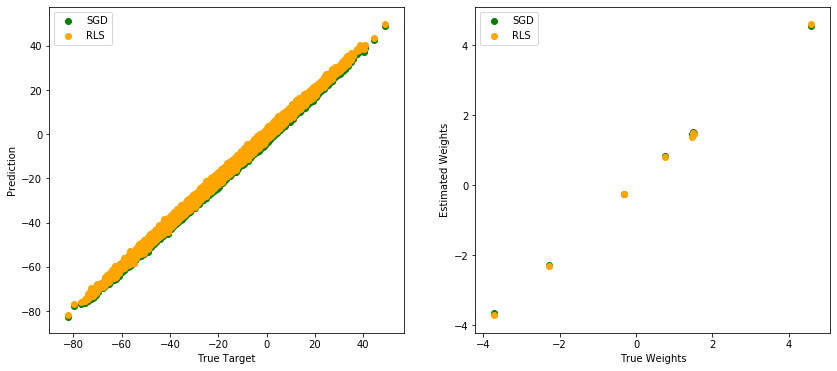

In [31]:
# plotting stochastic gradient descent solution
fig, ax = plt.subplots(figsize=(14,6),nrows=1, ncols=2)
ax[0].set(xlabel="True Target", ylabel="Prediction")
ax[0].scatter(y, y_est_SGD, c='g', label='SGD')
ax[0].scatter(y, y_est_RLS, c='orange', label='RLS')
ax[1].set(xlabel="True Weights", ylabel="Estimated Weights")
ax[1].scatter(w_true, w_est_SGD, c='g', label='SGD')
ax[1].scatter(w_true, w_est_RLS, c='orange', label='RLS')
ax[0].legend()
ax[1].legend()
#plt.savefig('RLS_Prediction.jpg')

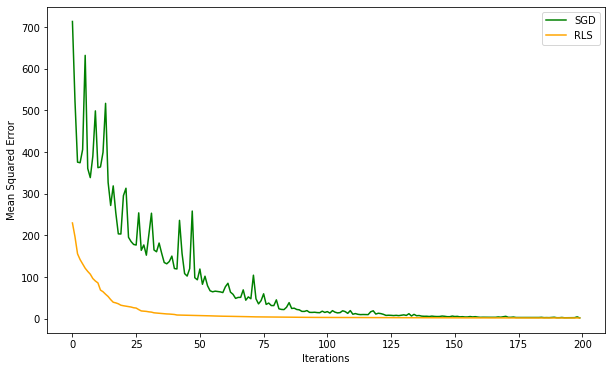

In [32]:
# plotting Error evolution
t_RLS = np.arange(len(test1[4]))
E_evolution_RLS = test1[4].reshape(len(test1[4]),1)
plt.figure(figsize=(10,6))
plt.plot(t_SGD[0:200], E_evolution_SGD[0:200], c='g', label='SGD')
plt.plot(t_RLS[:200], E_evolution_RLS[0:200], c='orange', label='RLS')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
#plt.savefig('RLS_Loss.jpg')
plt.show()

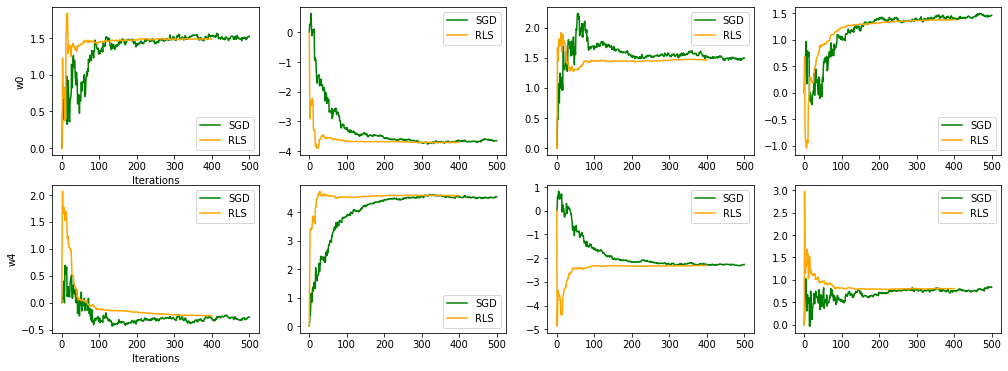

In [33]:
# plotting evolution of weights
w_evolution_RLS = test1[5]
t_RLS = np.arange(len(w_evolution_RLS[:,0]))
k=0
fig, ax = plt.subplots(figsize=(17,6),nrows=2, ncols=4)
for i in range(2):
    if i==0:
        ax[i][0].set(xlabel="Iterations", ylabel="w0")
    else:
        ax[i][0].set(xlabel="Iterations", ylabel="w4")
    for j in range(4):
        ax[i][j].plot(t_SGD, w_evolution_SGD[:,k], c='g', label='SGD')
        ax[i][j].plot(t_RLS[0:500], w_evolution_RLS[0:500,k], c='orange', label='RLS')
        ax[i][j].legend()
        k = k+1
#plt.savefig('RLS_weights.jpg')

In [34]:
#Is there a trend between speed of convergence and the dimensionality of the problem??
#yes- lower dimensionality is faster!! can illustrate by varying p

In [35]:
conv_net = np.zeros((100,10))
for k in range(100):
    conv = []
    for j in range(10,20):
        w_true_RLS = 10*rng2.random(size=(j,1)) -5 # uniform distribution between -5 and 5
        test2 = RLS(j, mem, w_true_RLS, init_data_points,iters) 
        for i in range(len(test2[4])):
            if test2[4][i]<0.1:
                conv.append(i)
                break
            if i==len(test2[4])-1:
                conv.append(i)
    conv_net[k] = np.asarray(conv).reshape(1,10)

NameError: name 'rng2' is not defined

In [81]:
conv_net_mean = np.mean(conv_net,axis=0)
p_conv = np.arange(10, 20)

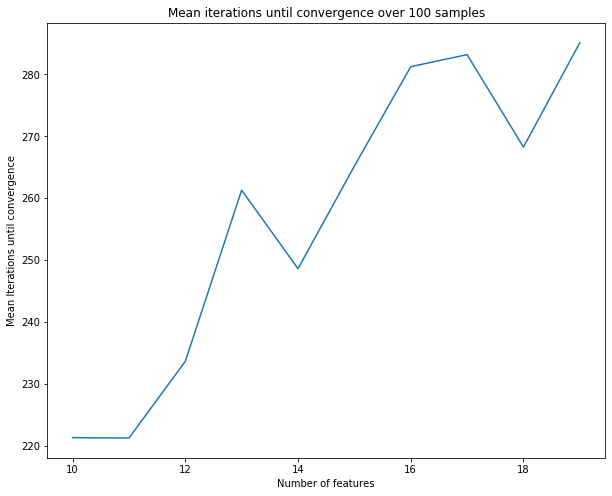

In [82]:
plt.figure(figsize=(10,8))
plt.plot(p_conv, conv_net_mean)
plt.xlabel('Number of features')
plt.ylabel('Mean Iterations until convergence')
plt.title('Mean iterations until convergence over 100 samples')
#plt.savefig('RLS_mean_convergence_time.jpg')
plt.show()

In [36]:
#Part 3

In [37]:
# importing parkinsons library
location = 'C:/Users/Carl/Documents/Year4/Semester2/Reinforcement_Learning/Labs/'
df = pd.read_csv(location+'parkinsons.data', sep=",", header=0)
df

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5870,42,61,0,142.7900,22.485,33.485,0.00406,0.000031,0.00167,0.00168,...,0.160,0.00973,0.01133,0.01549,0.02920,0.025137,22.369,0.64215,0.55314,0.21367
5871,42,61,0,149.8400,21.988,32.988,0.00297,0.000025,0.00119,0.00147,...,0.215,0.01052,0.01277,0.01904,0.03157,0.011927,22.886,0.52598,0.56518,0.12621
5872,42,61,0,156.8200,21.495,32.495,0.00349,0.000025,0.00152,0.00187,...,0.244,0.01371,0.01456,0.01877,0.04112,0.017701,25.065,0.47792,0.57888,0.14157
5873,42,61,0,163.7300,21.007,32.007,0.00281,0.000020,0.00128,0.00151,...,0.131,0.00693,0.00870,0.01307,0.02078,0.007984,24.422,0.56865,0.56327,0.14204


In [38]:
# splitting into input matrix and target array
targets2 = np.asarray(df.motor_UPDRS).reshape(len(df.motor_UPDRS),1) # motor UPDRS scores
data_mat2 = np.asarray(df[df.columns[6:22]]) # the voice recording data

In [39]:
data_mat2.shape

(5875, 16)

In [42]:
# linear regression with polynomials and sinusoidal basis functions
def poly_basis_fn(x, degree):
    return x ** degree
    #returns column of design matrix corresponding to the entered degree
    
def sine_basis_fn(x, f, Amp):
    return Amp*np.sin(2*np.pi*f*x)

In [43]:
def poly_basis_fn(x, degree):
    return x ** degree
    #returns column of design matrix corresponding to the entered degree
    
def sine_basis_fn(x, f, Amp):
    return Amp*np.sin(2*np.pi*f*x)



#defining design matrices
def poly_design(X, degree):
    A = poly_basis_fn(X, 1) #np.ones_like(X)
    for j in range(2, degree+1): # jth power of polynomial j = 1,...,p
        A = np.hstack((A, poly_basis_fn(X, j)))
    return A

def sine_design(X, order):
    rng2 = np.random.default_rng(seed=99)
    Amp = 50*rng2.random(1)
    A = sine_basis_fn(X, 0, Amp)
    for j in range(1, order+1): # jth power of polynomial j = 1,...,p
        Amp = 50*rng.random(1)
        A = np.hstack((A, sine_basis_fn(X, j, Amp)))
    return A

data_sine = sine_design(data_mat2, 1)
data_sine.shape

(5875, 32)

In [44]:
data_sine = data_mat2 #sine_design(data_mat2, 1)
data_sine.shape

(5875, 16)

In [45]:
# SGD
p_park = len(data_sine[0]) #data_mat2[0])
SGD_park = SGD(3000, 10**(-5), p_park, len(targets2), data_sine, targets2) #data_mat2, targets2)
E_evolution_SGD_park = SGD_park[2]
w_evolution_SGD_park = SGD_park[3]

In [46]:
# stochastic gradient descent solution
w_est_SGD_park = SGD_park[0]
y_est_SGD_park = data_sine @ w_est_SGD_park
print("final error was:", SGD_park[1])

final error was: [[93.19487146]]


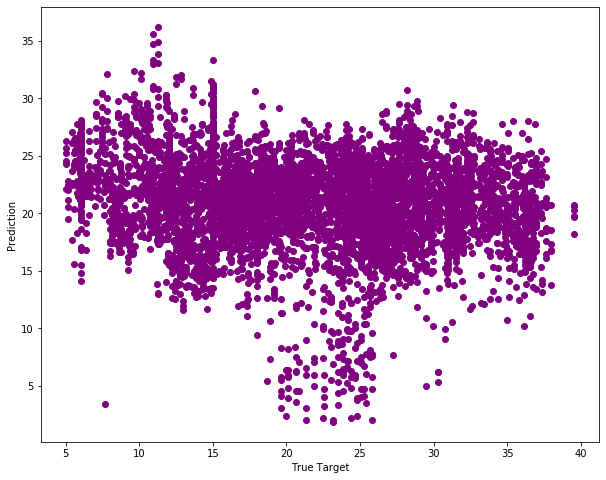

In [47]:
# plotting stochastic gradient descent solution
plt.figure(figsize=(10,8))
plt.scatter(targets2, y_est_SGD_park, c='purple')
plt.xlabel('True Target')
plt.ylabel('Prediction')
#plt.savefig('park_SGD_solution.jpg')
plt.show()

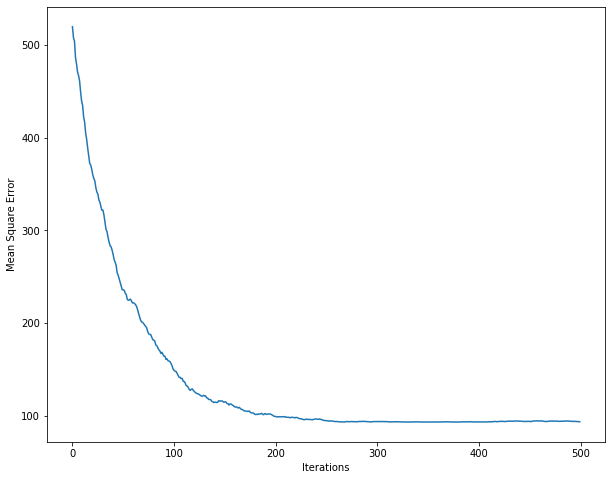

In [48]:
# plotting Error evolution
t_SGD_park = np.arange(len(E_evolution_SGD_park))
E_evolution_SGD_park = E_evolution_SGD_park.reshape(len(E_evolution_SGD_park),1)
plt.figure(figsize=(10,8))
plt.plot(t_SGD_park[0:500], E_evolution_SGD_park[0:500])
plt.xlabel('Iterations')
plt.ylabel('Mean Square Error')
#plt.savefig('park_SGD_Loss.jpg')
plt.show()

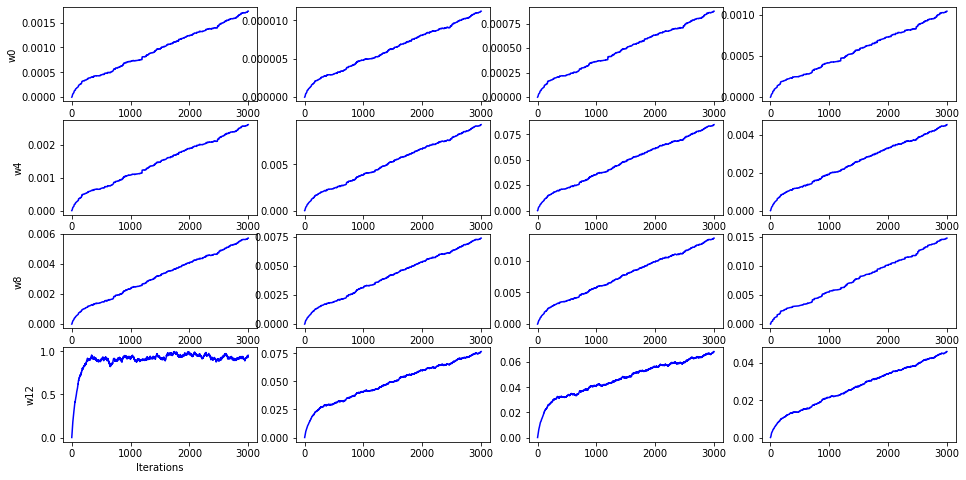

In [49]:
# plotting evolution of weights
t_SGD_park = np.arange(len(w_evolution_SGD_park[:,0]))
k=0
fig, ax = plt.subplots(figsize=(16,8),nrows=4, ncols=4)
for i in range(4):
    if i==0:
        ax[i][0].set(ylabel="w0")
    if i==1:
        ax[i][0].set(ylabel="w4")
    if i==2:
        ax[i][0].set(xlabel="Iterations", ylabel="w8")
    if i==3:
        ax[i][0].set(xlabel="Iterations", ylabel="w12")
    for j in range(4):     
        ax[i][j].plot(t_SGD_park, w_evolution_SGD_park[:,k], c='b')
        k = k+1
        
#plt.savefig('park_SGD_weights.jpg')

In [50]:
# RLS
init_data_points = 20
iters = 3000 #len(targets2) - init_data_points
mem = 1 #defining the mem coefficient of each index
RLS_park = RLS(p_park, mem, init_data_points,iters, data_sine, targets2)

In [51]:
w_est_RLS_park = RLS_park[0] #w_RLS
y_est_RLS_park = data_sine @ w_est_RLS_park
print("final error was:", RLS_park[2])

final error was: 54.33769755323689


Text(0, 0.5, 'Prediction')

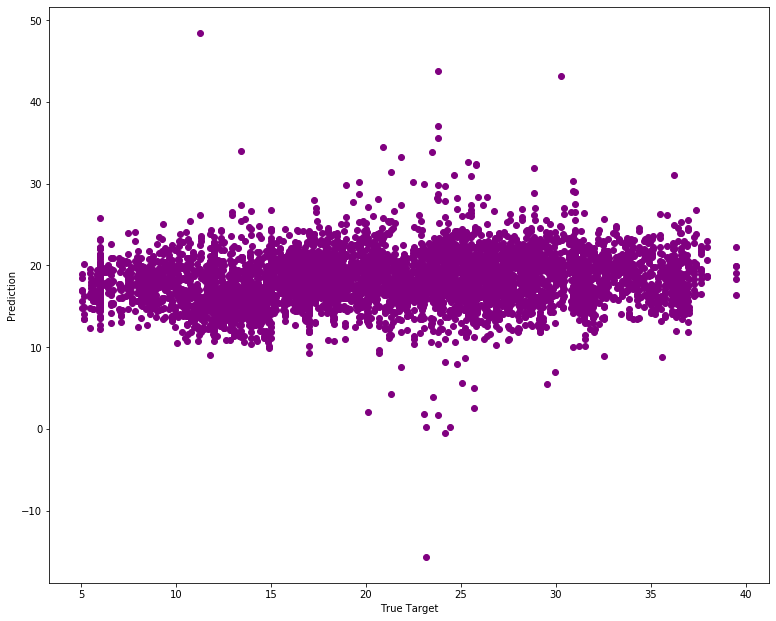

In [52]:
fig = plt.figure(figsize=(10,8))
a1 = fig.add_axes([0,0,1,1])
a1.scatter(targets2, y_est_RLS_park, c='purple')
a1.set_xlabel('True Target')
a1.set_ylabel('Prediction')
#a1.set_ylim(-10,60)
#plt.savefig('park_RLS_solution.jpg')

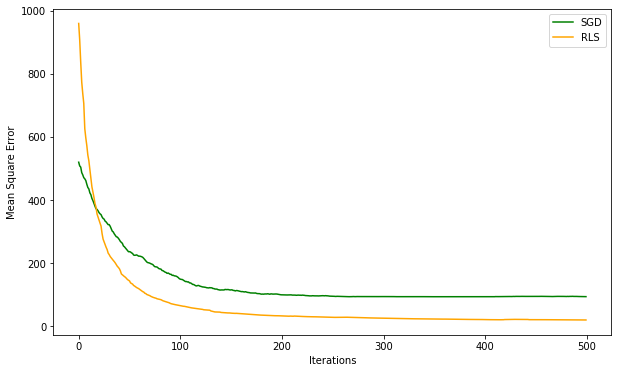

In [53]:
# plotting Error evolution
t_RLS_park = np.arange(len(RLS_park[4]))
E_evolution_RLS_park = RLS_park[4].reshape(len(RLS_park[4]),1)
plt.figure(figsize=(10,6))
plt.plot(t_SGD_park[0:500], E_evolution_SGD_park[0:500], c='g', label='SGD')
plt.plot(t_RLS_park[0:500], E_evolution_RLS_park[0:500], c='orange', label='RLS')
plt.xlabel('Iterations')
plt.ylabel('Mean Square Error')
plt.legend()
#plt.savefig('park_RLS_Loss.jpg')
plt.show()

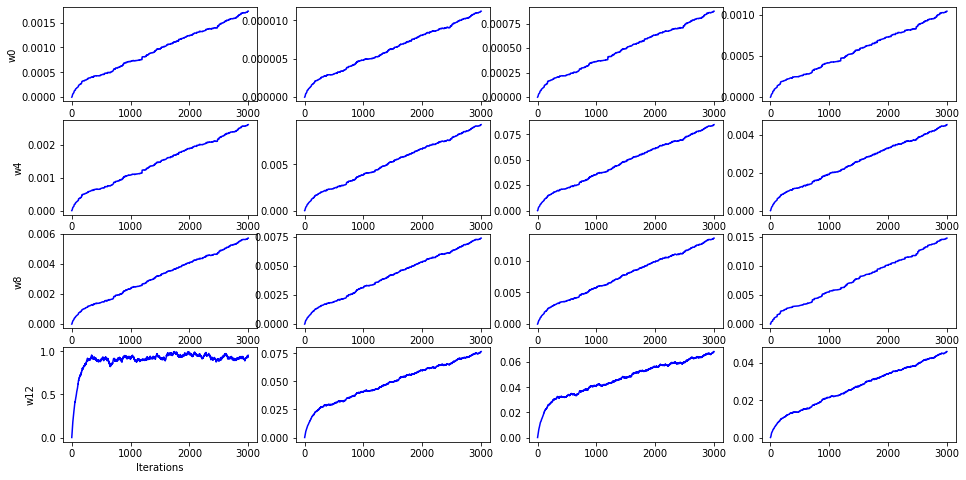

In [54]:
# plotting evolution of weights
t_SGD_park = np.arange(len(w_evolution_SGD_park[:,0]))
k=0
fig, ax = plt.subplots(figsize=(16,8),nrows=4, ncols=4)
for i in range(4):
    if i==0:
        ax[i][0].set(ylabel="w0")
    if i==1:
        ax[i][0].set(ylabel="w4")
    if i==2:
        ax[i][0].set(xlabel="Iterations", ylabel="w8")
    if i==3:
        ax[i][0].set(xlabel="Iterations", ylabel="w12")
    for j in range(4):     
        ax[i][j].plot(t_SGD_park, w_evolution_SGD_park[:,k], c='b')
        k = k+1
#plt.savefig('park_RLS_weights.jpg')

In [55]:
# closed form
w_est_cf_park = np.linalg.pinv(data_sine.T @ data_sine) @ data_sine.T @ targets2
y_est_cf_park = data_sine @ w_est_cf_park

E_cf_park = (1/len(targets2))*(targets2 - y_est_cf_park).T @ (targets2 - y_est_cf_park)
print("final error was:", E_cf_park)

final error was: [[62.83308751]]


(-10, 60)

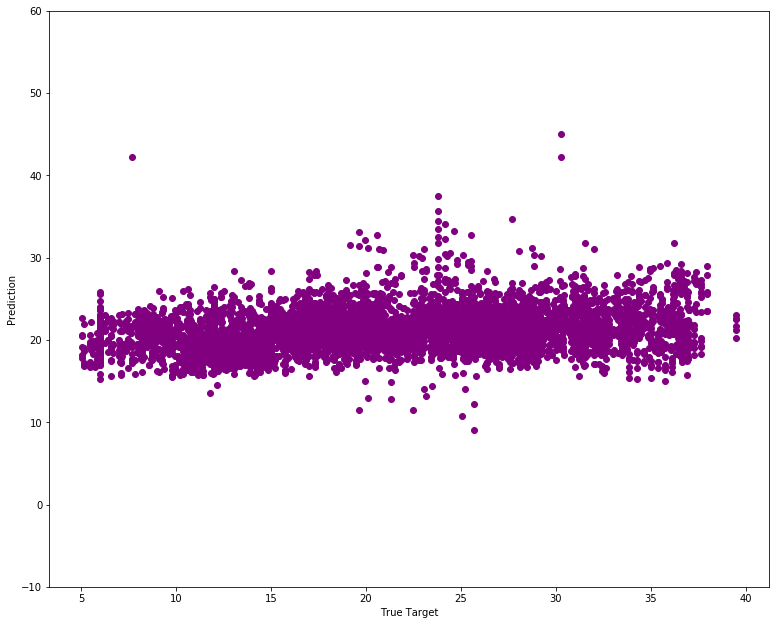

In [56]:
# plotting CF solution
fig2 = plt.figure(figsize=(10,8))
a2 = fig2.add_axes([0,0,1,1])
a2.scatter(targets2, y_est_cf_park, c='purple')
a2.set_xlabel('True Target')
a2.set_ylabel('Prediction')
a2.set_ylim(-10,60)
#plt.savefig('park_CF_solution.jpg')

In [57]:
# Part 4- RLS using statsmodels

In [58]:
mod2 = sm.RecursiveLS(y, X)

In [59]:
res2 = mod2.fit()
w_est_RLSstats_park = res2.recursive_coefficients.filtered.T[len(res2.recursive_coefficients.filtered.T)-1] #w_RLS
y_est_RLSstats_park = X @ w_est_RLSstats_park

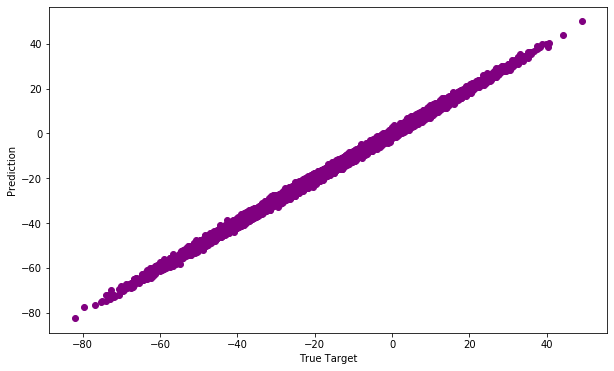

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(y, y_est_RLSstats_park, c='purple')
plt.xlabel('True Target')
plt.ylabel('Prediction')
#plt.savefig('red_RLSstats_solution.jpg')
plt.show()

In [63]:
w_est_stats = res2.recursive_coefficients.filtered.T[9999].T.reshape(8,1)
y_est_stats = X @ w_est_stats

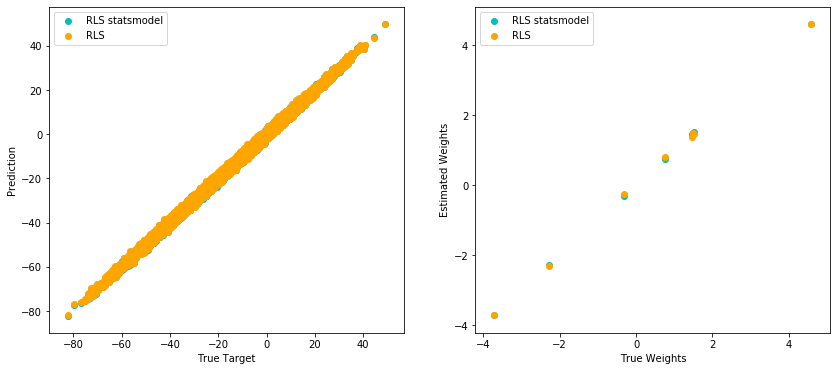

In [66]:
# plotting gradient descent solution
fig, ax = plt.subplots(figsize=(14,6),nrows=1, ncols=2)
ax[0].set(xlabel="True Target", ylabel="Prediction")
ax[0].scatter(y, y_est_stats, c='c', label='RLS statsmodel')
ax[0].scatter(y, y_est_RLS, c='orange', label='RLS')
ax[1].set(xlabel="True Weights", ylabel="Estimated Weights")
ax[1].scatter(w_true, w_est_stats, c='c', label='RLS statsmodel')
ax[1].scatter(w_true, w_est_RLS, c='orange', label='RLS')
ax[0].legend()
ax[1].legend()
#plt.savefig('Prediction_RLS.jpg')
plt.show()

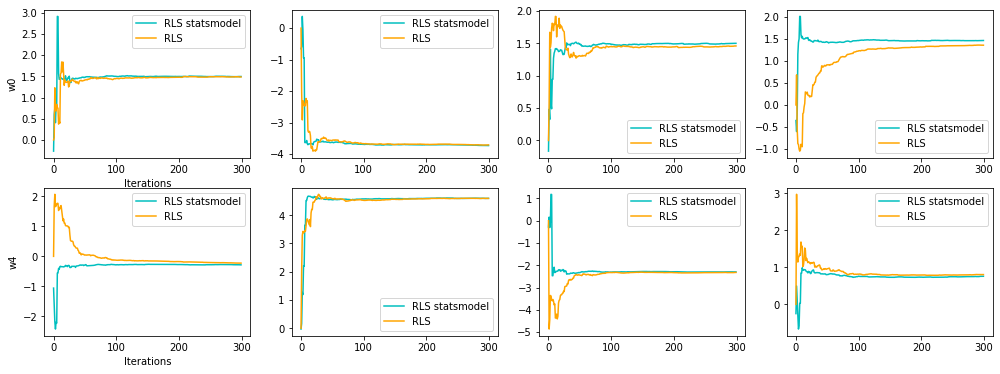

In [62]:
# plotting evolution of weights
w_evolution_RLS = test1[5]
t_RLS = np.arange(len(w_evolution_RLS[:,0]))
t_stats = np.arange(len(res2.recursive_coefficients.filtered[0]))
k=0
fig, ax = plt.subplots(figsize=(17,6),nrows=2, ncols=4)
for i in range(2):
    if i==0:
        ax[i][0].set(xlabel="Iterations", ylabel="w0")
    else:
        ax[i][0].set(xlabel="Iterations", ylabel="w4")
    for j in range(4):
        ax[i][j].plot(t_stats[0:300], res2.recursive_coefficients.filtered[k,0:300], c='c', label='RLS statsmodel')
        ax[i][j].plot(t_RLS[0:300], w_evolution_RLS[0:300,k], c='orange', label='RLS')
        ax[i][j].legend()
        k = k+1
#plt.savefig('Stats_weights.jpg')

In [989]:
E_RLS = (1/len(y))*(y - X @ w_est_RLS).T @ (y - X @ w_est_RLS)
a = res2.recursive_coefficients.filtered.T[9999].T.reshape(8,1)
E_stats = (1/len(y))*(y - X @ a).T @ (y - X @ a)

In [990]:
print(E_RLS)
print(E_stats)

[[1.14120984]]
[[0.99155544]]
